In [2]:
%load_ext autoreload
%autoreload 2

from gninvert.nn import GeneralLinearFullNet
import torch as t
import math
import matplotlib.pyplot as plt
from gninvert.hyperparamsearch import hpsearch
from gninvert.data_generation import TrainingData

import numpy as np
import networkx as nx
from gninvert.hyperparamsearch import get_hyperparam_dtree
from gninvert.dtree import variance, approx_equal_gen, decision_tree_paths, dtree_to_networkx, draw_dtree


In [3]:
results = t.load('models/bighpsearch')

NOTE: the above file is too large to sensibly host on Git (~60MiB), therefore it will not exist if you got this from the GitHub repository. It can be replicated by training for several hours on a decent CPU with the `nn_tests` notebook

In [6]:
dtree = get_hyperparam_dtree(
    results,
    eq_threshold = 10
)
dtree

<<<DTREE on <ATTRIBUTE loss_func taking values (MSELoss(), L1Loss())
  --(MSELoss())-->
  <<<DTREE on <ATTRIBUTE optimizer taking values ('adam', 'sgd')
    --(adam)-->
    <<<DTREE on <ATTRIBUTE regularization_coefficient taking values (False, 1e-05, 0.001)
      --(False)-->
      <<<DTREE on <ATTRIBUTE 5 taking values (False, True)
        --(False)-->
        <<<DTREE on <ATTRIBUTE 4 taking values (<class 'torch.nn.modules.activation.GELU'>, <class 'torch.nn.modules.activation.Sigmoid'>)
          --(<class 'torch.nn.modules.activation.GELU'>)-->
          <LEAF -11.023685167972358>
          --(<class 'torch.nn.modules.activation.Sigmoid'>)-->
          <LEAF -9.043923563421064> >>>
        --(True)-->
        <<<DTREE on <ATTRIBUTE 4 taking values (<class 'torch.nn.modules.activation.GELU'>, <class 'torch.nn.modules.activation.Sigmoid'>)
          --(<class 'torch.nn.modules.activation.GELU'>)-->
          <<<DTREE on <ATTRIBUTE 3 taking values ([32, 32], [8, 8, 8], [32], [128], 

In [6]:
decision_tree_paths(dtree)

[[('loss_func', MSELoss()),
  ('optimizer', 'adam'),
  ('regularization_coefficient', False),
  (5, True),
  (4, torch.nn.modules.activation.GELU),
  (3, (8, 8, 8)),
  -11.528252043512717],
 [('loss_func', MSELoss()),
  ('optimizer', 'adam'),
  ('regularization_coefficient', False),
  (5, True),
  (4, torch.nn.modules.activation.GELU),
  (3, (32,)),
  -11.18513402209824],
 [('loss_func', MSELoss()),
  ('optimizer', 'adam'),
  ('regularization_coefficient', False),
  (5, True),
  (4, torch.nn.modules.activation.GELU),
  (3, (32, 32)),
  -11.175343247056796],
 [('loss_func', MSELoss()),
  ('optimizer', 'adam'),
  ('regularization_coefficient', False),
  (5, True),
  (4, torch.nn.modules.activation.GELU),
  (3, (8, 8)),
  -10.7455235304654],
 [('loss_func', MSELoss()),
  ('optimizer', 'adam'),
  ('regularization_coefficient', False),
  (5, True),
  (4, torch.nn.modules.activation.GELU),
  (3, (8,)),
  -10.11597149223852],
 [('loss_func', MSELoss()),
  ('optimizer', 'adam'),
  ('regulariza

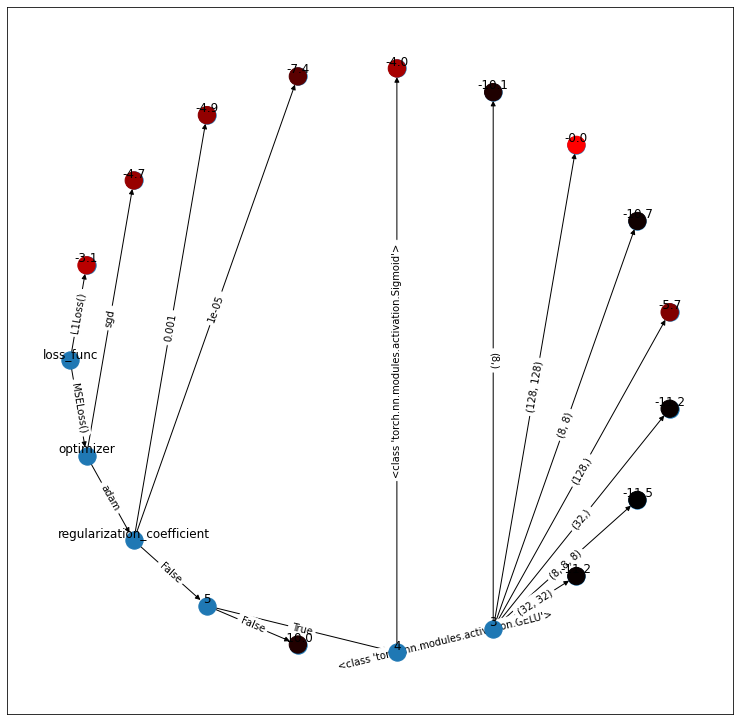

In [7]:
nxg = dtree_to_networkx(dtree)
plt.rcParams['figure.figsize'] = [13, 13]
draw_dtree(dtree)

In [10]:
results2 = t.load('models/find_model_hp_res_sim1')

In [13]:
dtree = get_hyperparam_dtree(
    results2,
    eq_threshold = 11
)
dtree

<<<DTREE on <ATTRIBUTE 3 taking values ([6, 6, 6], [4, 4], [16, 16], [2, 2, 2], [2], [64], [256])
  --((6, 6, 6))-->
  <LEAF -6.955619682422288>
  --((4, 4))-->
  <LEAF -7.670290806170929>
  --((16, 16))-->
  <LEAF -5.07538002101046>
  --((2, 2, 2))-->
  <<<DTREE on <ATTRIBUTE batch_size taking values (2, 16)
    --(2)-->
    <LEAF -6.494210157744434>
    --(16)-->
    <LEAF -3.7395116063209906> >>>
  --((2,))-->
  <LEAF -6.582640475723595>
  --((64,))-->
  <LEAF -2.311130325038595>
  --((256,))-->
  <LEAF 1.0173379297758989> >>>

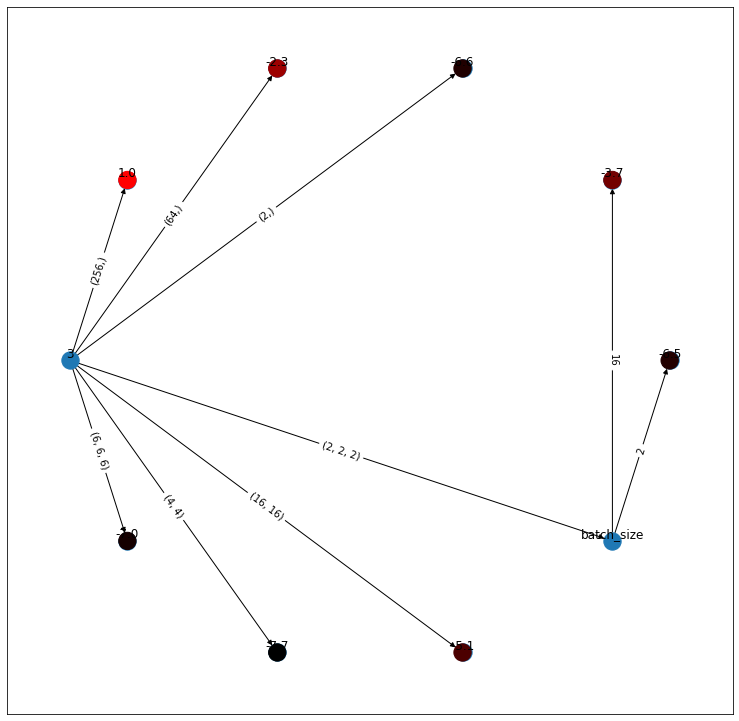

In [14]:
draw_dtree(dtree)